In [ ]:
!pip install pulser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully uninstalled idna-3.4
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.2.18 requires requests>=2.26, but you have requests 2.25.1 which is incompatible.
tweepy 4.1

In [ ]:
import numpy as np
from pulser import Pulse, Sequence, Register

# Step 1 - Creating the register

In [ ]:
L = 4
square = np.array([[i,j] for i in range(L) for j in range(L)], dtype=float)

In [ ]:
square -= np.mean(square, axis=0)
square *= 5

In [ ]:
qubits = dict(enumerate(square))

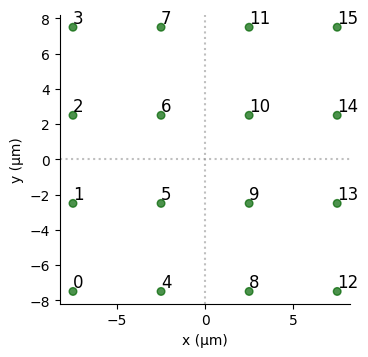

In [ ]:
reg = Register(qubits)
reg.draw()

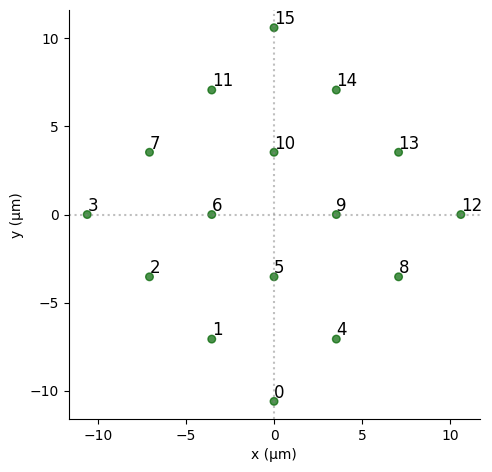

In [ ]:
reg1 = Register(qubits)
reg1.rotate(45)
reg1.draw()

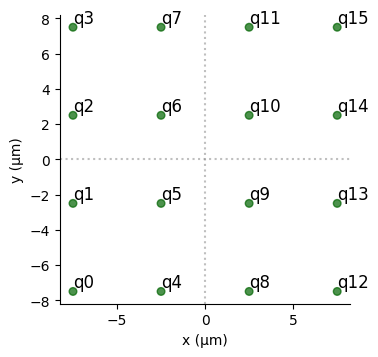

In [ ]:
# Alternative statement
reg2 = Register.from_coordinates(square, prefix='q')  # It also automatically centers the figure
reg2.draw()

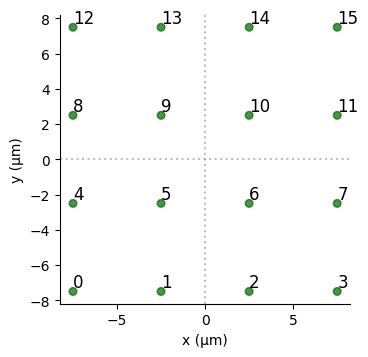

In [ ]:
# Or with built-in methods:
reg3 = Register.square(4, spacing=5) # the spacing is in micrometers
reg3.draw()

# Step 2 - Initializing the Sequence

In [ ]:
from pulser.devices import Chadoq2
seq = Sequence(reg, Chadoq2)

# Step 3 - Declaring the Channels that will be used

In [ ]:
# Inspecting what channels are available on this device:
seq.available_channels

{'rydberg_global': Rydberg.Global(Max Absolute Detuning: 125.66370614359172 rad/µs, Max Amplitude: 15.707963267948966 rad/µs, Clock period: 4 ns, Minimum pulse duration: 16 ns, Maximum pulse duration: 67108864 ns, Basis: 'ground-rydberg'),
 'rydberg_local': Rydberg.Local(Max Absolute Detuning: 125.66370614359172 rad/µs, Max Amplitude: 62.83185307179586 rad/µs, Minimum retarget time: 220 ns, Fixed retarget time: 0 ns, Max targets: 1, Clock period: 4 ns, Minimum pulse duration: 16 ns, Maximum pulse duration: 67108864 ns, Basis: 'ground-rydberg'),
 'raman_local': Raman.Local(Max Absolute Detuning: 125.66370614359172 rad/µs, Max Amplitude: 62.83185307179586 rad/µs, Minimum retarget time: 220 ns, Fixed retarget time: 0 ns, Max targets: 1, Clock period: 4 ns, Minimum pulse duration: 16 ns, Maximum pulse duration: 67108864 ns, Basis: 'digital')}

In [ ]:
# We select the 'raman_local' and the 'rydberg_local' channels:
seq.declare_channel('Ch0', 'raman_local')
seq.available_channels

{'rydberg_global': Rydberg.Global(Max Absolute Detuning: 125.66370614359172 rad/µs, Max Amplitude: 15.707963267948966 rad/µs, Clock period: 4 ns, Minimum pulse duration: 16 ns, Maximum pulse duration: 67108864 ns, Basis: 'ground-rydberg'),
 'rydberg_local': Rydberg.Local(Max Absolute Detuning: 125.66370614359172 rad/µs, Max Amplitude: 62.83185307179586 rad/µs, Minimum retarget time: 220 ns, Fixed retarget time: 0 ns, Max targets: 1, Clock period: 4 ns, Minimum pulse duration: 16 ns, Maximum pulse duration: 67108864 ns, Basis: 'ground-rydberg')}

In [ ]:
seq.declare_channel('Ch1', 'rydberg_local', initial_target=4)
seq.available_channels

{'rydberg_global': Rydberg.Global(Max Absolute Detuning: 125.66370614359172 rad/µs, Max Amplitude: 15.707963267948966 rad/µs, Clock period: 4 ns, Minimum pulse duration: 16 ns, Maximum pulse duration: 67108864 ns, Basis: 'ground-rydberg')}

In [ ]:
seq.declared_channels

{'Ch0': Raman.Local(Max Absolute Detuning: 125.66370614359172 rad/µs, Max Amplitude: 62.83185307179586 rad/µs, Minimum retarget time: 220 ns, Fixed retarget time: 0 ns, Max targets: 1, Clock period: 4 ns, Minimum pulse duration: 16 ns, Maximum pulse duration: 67108864 ns, Basis: 'digital'),
 'Ch1': Rydberg.Local(Max Absolute Detuning: 125.66370614359172 rad/µs, Max Amplitude: 62.83185307179586 rad/µs, Minimum retarget time: 220 ns, Fixed retarget time: 0 ns, Max targets: 1, Clock period: 4 ns, Minimum pulse duration: 16 ns, Maximum pulse duration: 67108864 ns, Basis: 'ground-rydberg')}

# Step 4 - Composing the Sequence

In [ ]:
# Every local channel has to start with an initial target:
seq.target(1, 'Ch0')

In [ ]:
# Let's start building a simple pulse with constant amplitude of 2 rad/microsec 
# and constant detuning of -10 rad/microsec and duration 200 ns
simple_pulse = Pulse.ConstantPulse(duration=200, amplitude=2, detuning=-10, phase=0)

In [ ]:
# Let's now add this pulse to the sequence through Ch0 (i.e. a raman transition on atom 1)
seq.add(simple_pulse, 'Ch0')

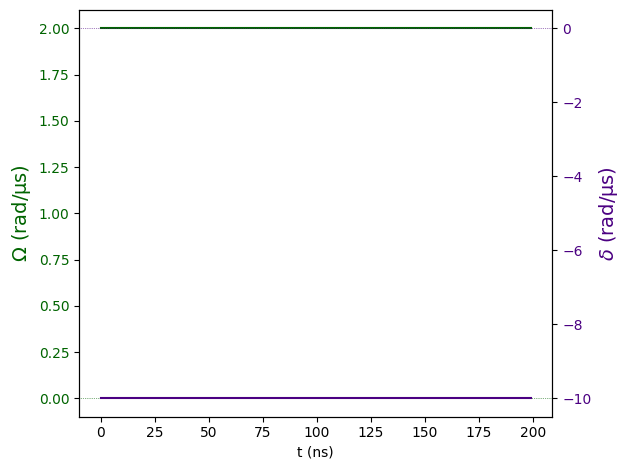

In [ ]:
simple_pulse.draw()

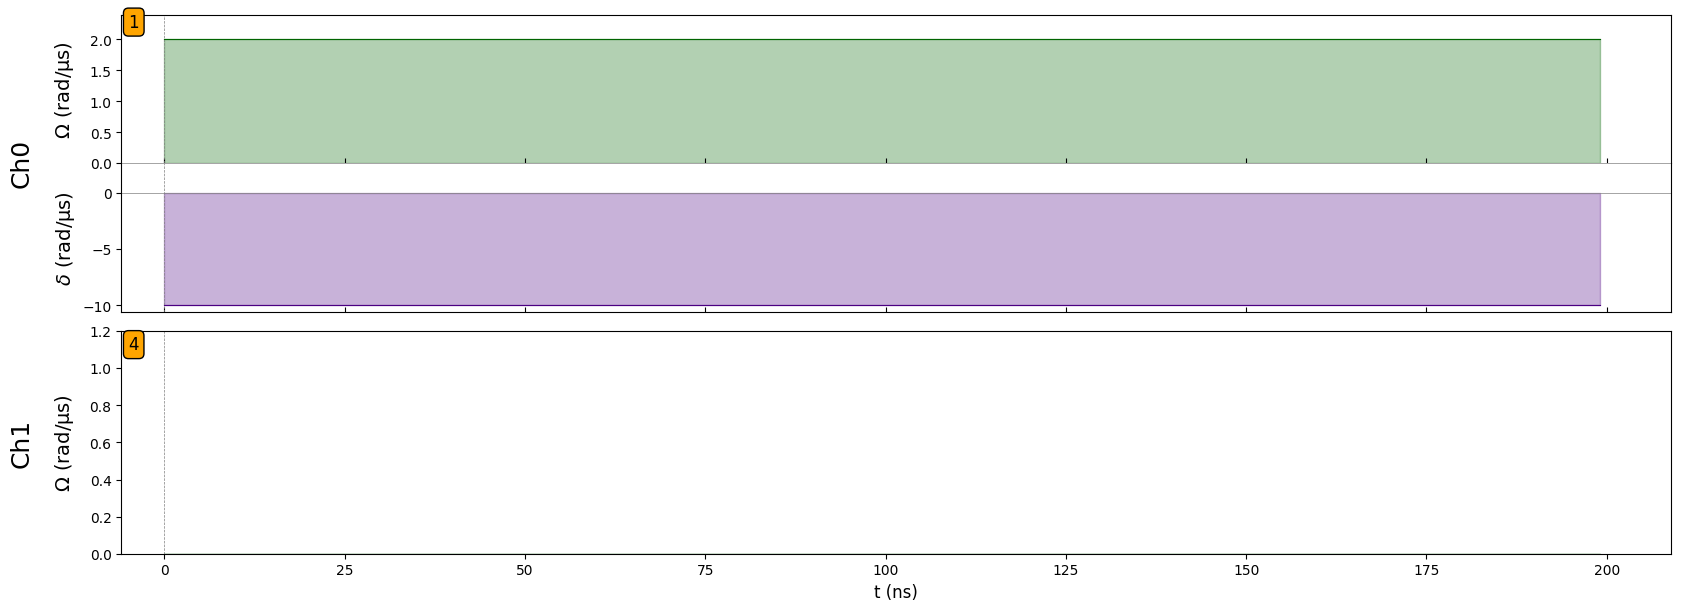

In [ ]:
seq.draw()

In [ ]:
# Suppose we want to freeze Ch1 for a duration of 100 ns:
seq.delay(100, 'Ch1')

In [ ]:
# Now suppose we want to add to 'Ch1' a more complex pulse with a non constant amplitude 
# and a non constant detuing (over time)
from pulser.waveforms import RampWaveform, BlackmanWaveform

In [ ]:
amp_wf = BlackmanWaveform(duration=1000, area=np.pi/2)
detuning_wf = RampWaveform(duration=1000, start=-20, stop=20)

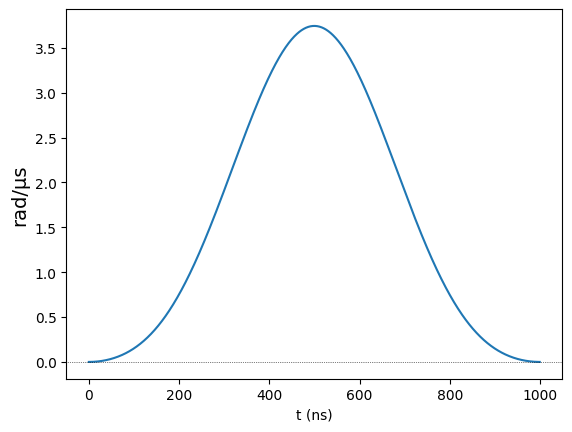

In [ ]:
amp_wf.draw()

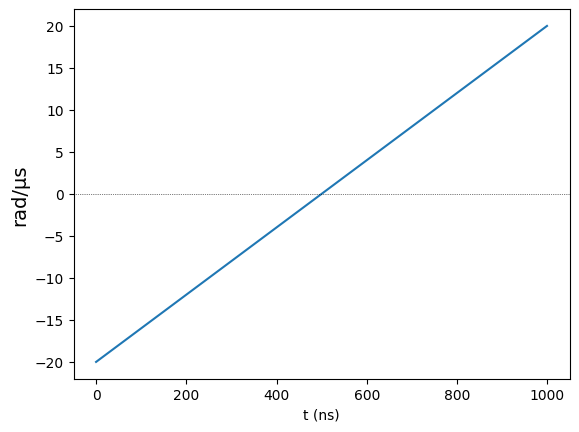

In [ ]:
detuning_wf.draw()

In [ ]:
amp_wf.integral

1.5707963267948968

In [ ]:
complex_pulse = Pulse(amplitude=amp_wf, detuning=detuning_wf, phase=0)

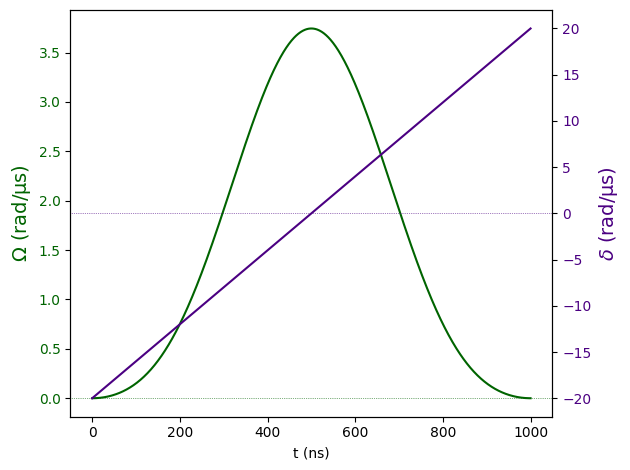

In [ ]:
complex_pulse.draw()

In [ ]:
seq.add(complex_pulse, 'Ch1')

In [ ]:
print(seq)

Channel: Ch0
t: 0 | Initial targets: 1 | Phase Reference: 0.0 
t: 0->200 | Pulse(Amp=2 rad/µs, Detuning=-10 rad/µs, Phase=0) | Targets: 1

Channel: Ch1
t: 0 | Initial targets: 4 | Phase Reference: 0.0 
t: 0->100 | Delay 
t: 100->1100 | Pulse(Amp=Blackman(Area: 1.57), Detuning=Ramp(-20->20 rad/µs), Phase=0) | Targets: 4




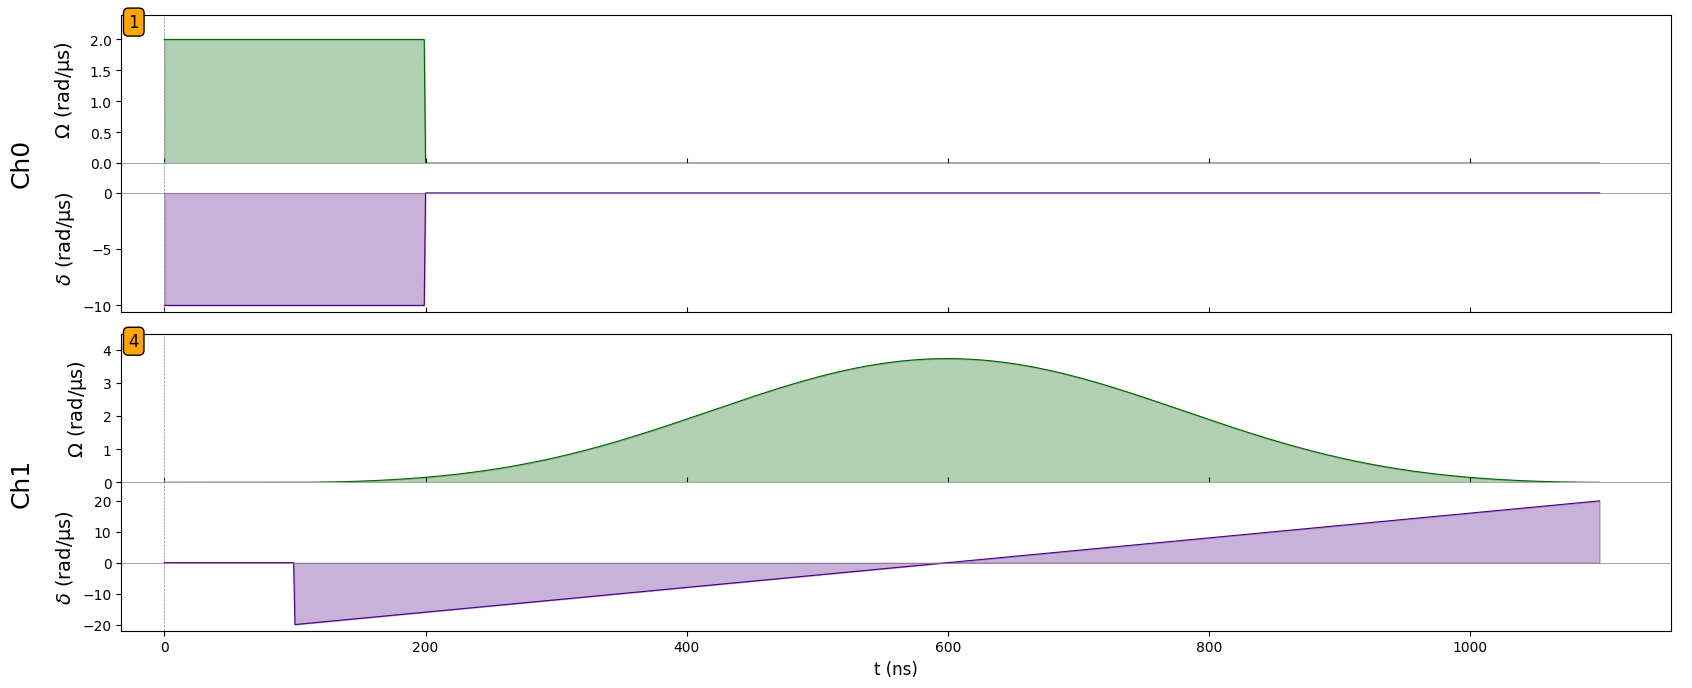

In [ ]:
seq.draw()

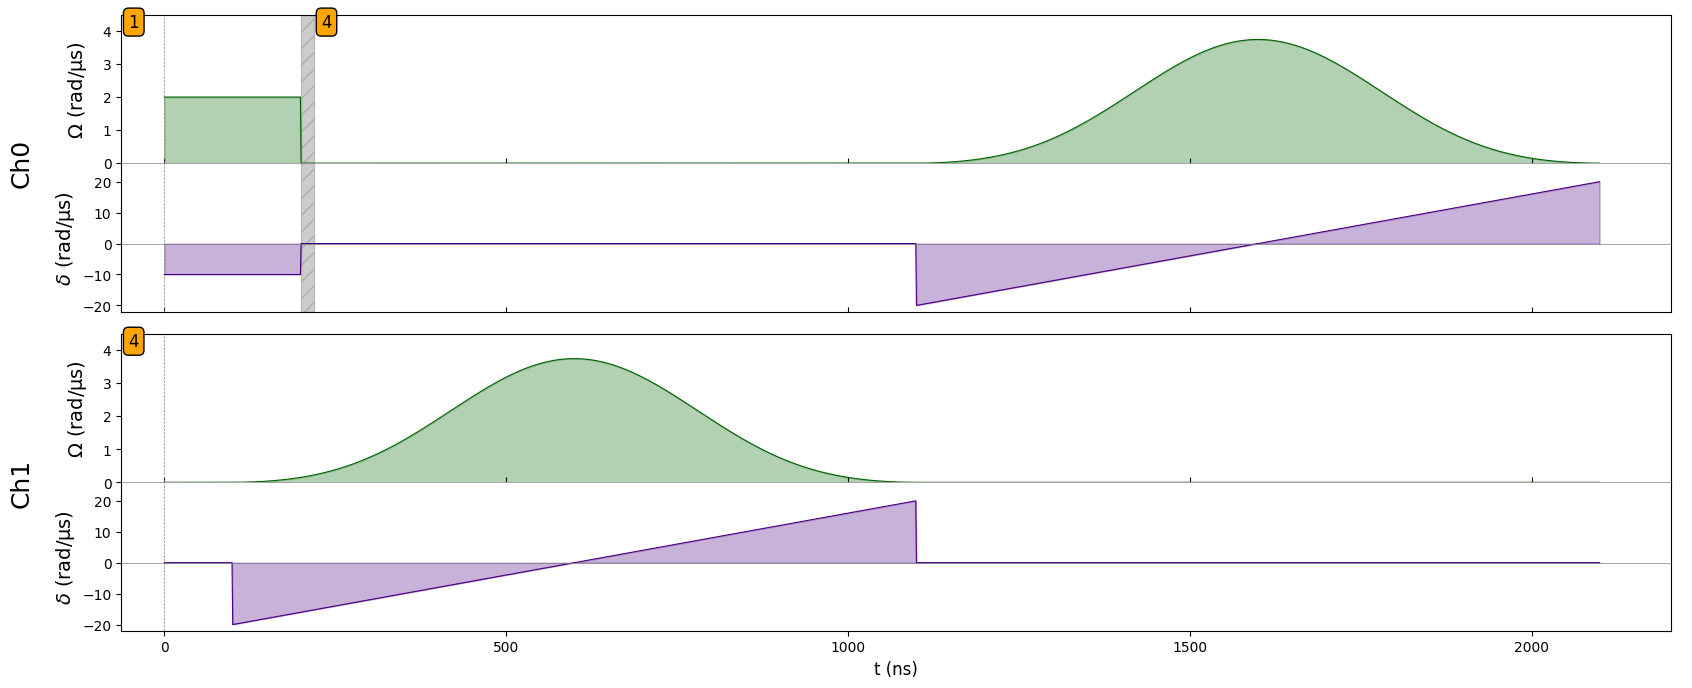

In [ ]:
# Let's try to target the same atom with two different lasers (i.e. channels) simultaneously:
seq.target(4, 'Ch0')
seq.add(complex_pulse, 'Ch0')
seq.draw()  # implicit protocol = 'min-delay'

In [ ]:
# Other protocol = 'wait-for-all':
seq.target(0, 'Ch1')

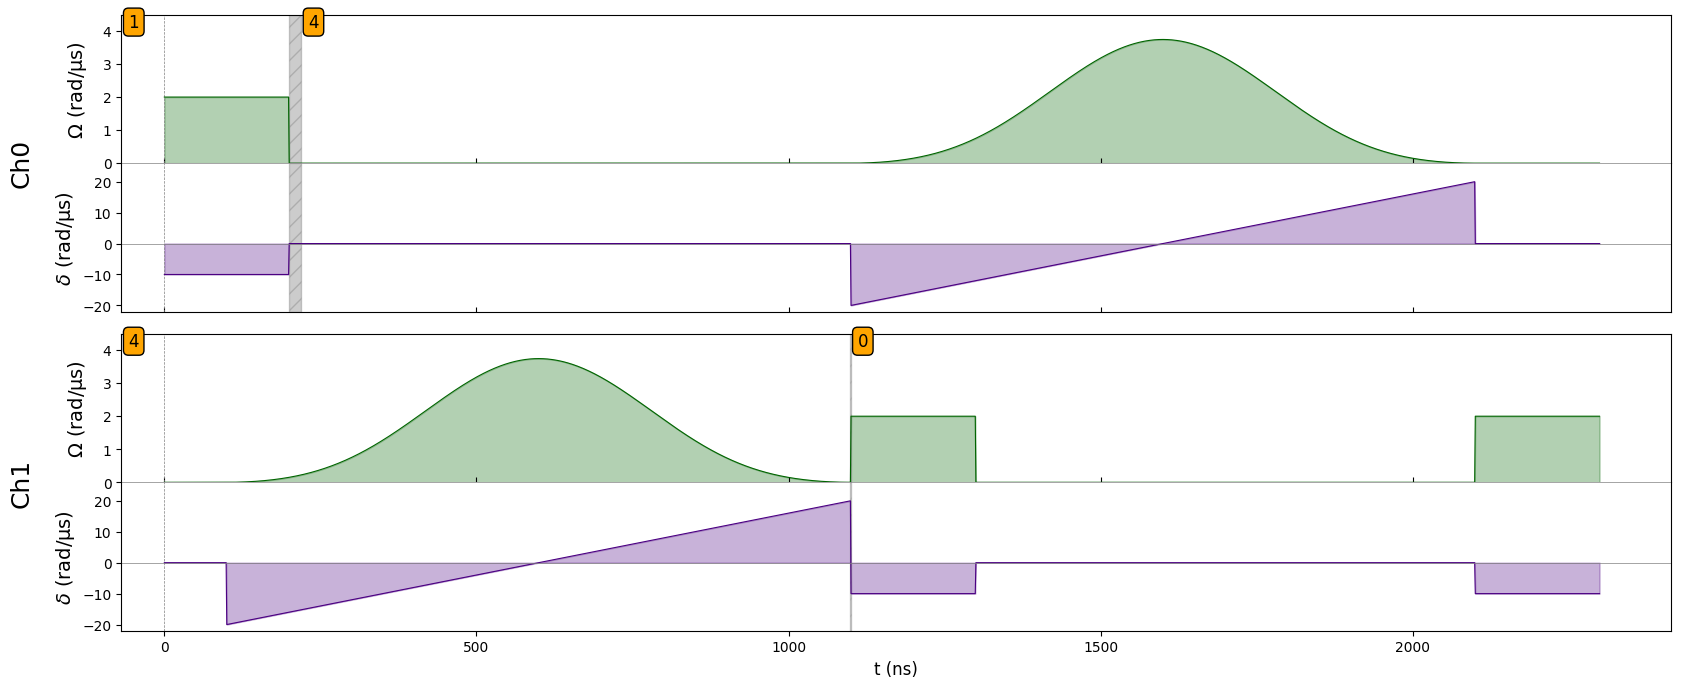

In [ ]:
seq.add(simple_pulse, 'Ch1', protocol='min-delay')
seq.add(simple_pulse, 'Ch1', protocol='wait-for-all')
seq.draw()

# Step 5 - Measurement

In [ ]:
# When adding measurement, all the atoms will be measured (you cannot select just a few of them)
Chadoq2.supported_bases

{'digital', 'ground-rydberg'}

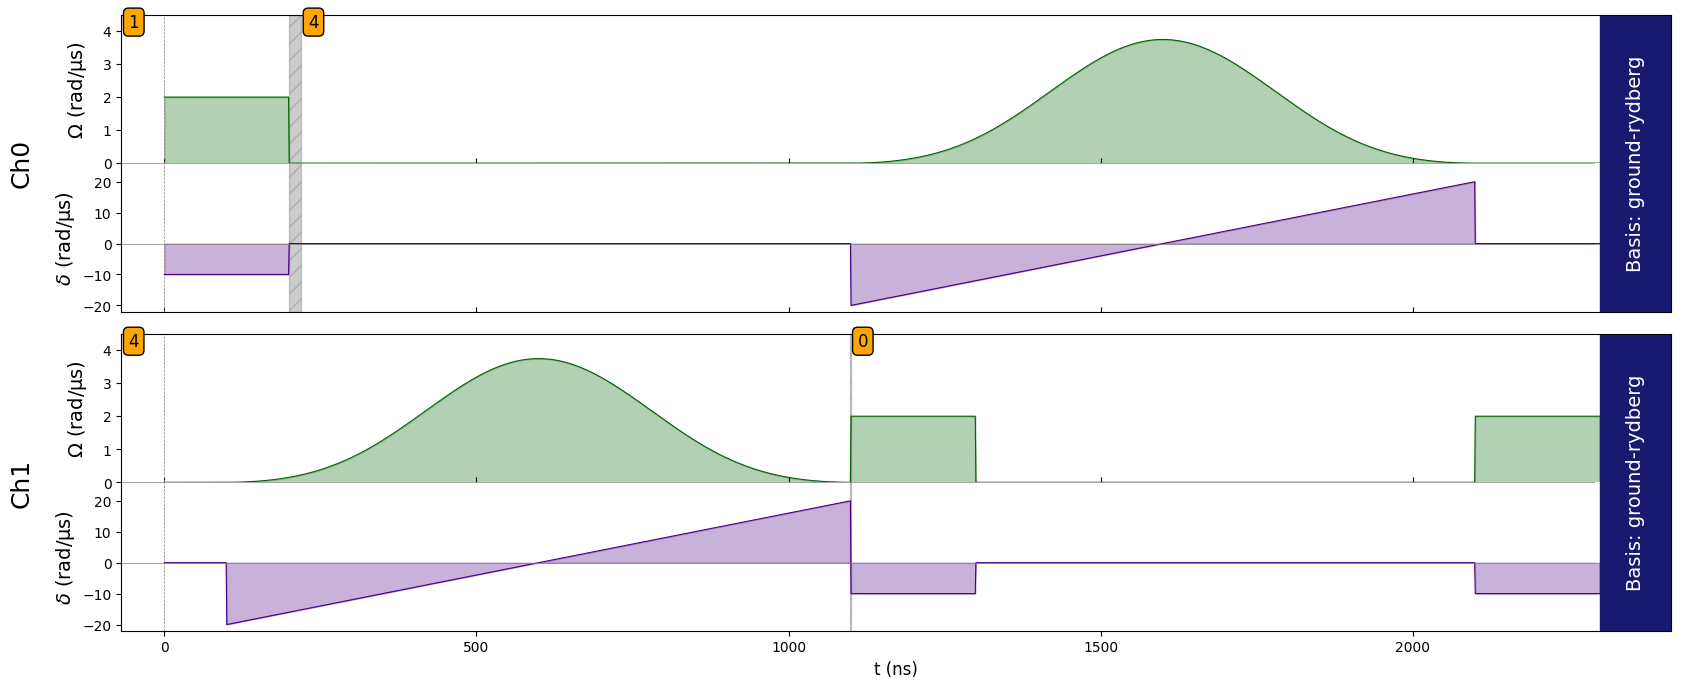

In [ ]:
seq.measure(basis='ground-rydberg')
seq.draw()